In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML



### Data

In [2]:
def blogData_train_read() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv("./data/blogData_train.csv", header=None)
    data.drop_duplicates(inplace=True)
    
    header = pd.read_csv("./data/blogData_label.csv", header=None)
    header = list(header[0])
    
    if len(header) != data.shape[1] :
        raise Exception('Los encabezados y la cantidad de características NO COINCIDE !!!')

    data.columns = header
    
    return data


In [3]:
data = blogData_train_read()
data.shape

(49203, 281)

In [4]:
data

,media_nc_total_before_BT,std_nc_total_before_BT,min_nc_total_before_BT,max_nc_total_before_BT,median_nc_total_before_BT,media_nc_24_before_BT,std_nc_24_before_BT,min_nc_24_before_BT,max_nc_24_before_BT,median_nc_24_before_BT,...,wednesday_post,thursday_post,friday_post,saturday_post,sunday_post,parents,min_parents,max_parents,media_parents,comments
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
5,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def blogData_labels(data) :
    u''' Create a dictionary with some keys associates to list of features in the final work dataframe
    
    '''
    columns = list(data.columns)

    labels = dict()

    labels['sd_nc_total_before_BT'] = columns[0:5]
    labels['nc_total_before_BT'] = columns[50:51]
    labels['sd_nc_24_before_BT'] = columns[5:10]
    labels['nc_24_before_BT'] = columns[51:52]
    labels['sd_nc_between_24_48'] = columns[10:15]
    labels['nc_between_24_48'] = columns[52:53]
    labels['sd_nc_first_24_BT'] = columns[15:20]
    labels['nc_first_24_BT'] = columns[53:54]
    labels['sd_nc_diff_24_48'] = columns[20:25]
    labels['nc_diff_24_48'] = columns[54:55]
    labels['sd_nl_total_before_BT'] = columns[25:30]
    labels['nl_total_before_BT'] = columns[55:56]
    labels['sd_nl_24_before_BT'] = columns[30:35]
    labels['nl_24_before_BT'] = columns[56:57]
    labels['sd_nl_between_24_48'] = columns[35:40]
    labels['nl_between_24_48'] = columns[57:58]
    labels['sd_nl_first_24_BT'] = columns[40:45]
    labels['nl_first_24_BT'] = columns[58:59]
    labels['sd_nl_diff_24_48'] = columns[45:50]
    labels['nl_diff_24_48'] = columns[59:60]
    
    labels['nc'] = columns[50:55]
    labels['nl'] = columns[55:60]

    labels['timelength_post_BT'] = columns[60:61]
    labels['length_post'] = columns[61:62]

    labels['frequent_word'] = columns[62:262]

    labels['weekday_BT'] = columns[262:269]
    labels['weekday_post'] = columns[269:276]
    labels['parents'] = columns[276:280]
    labels['comments'] = columns[280:281]

    return labels


In [27]:

labels = blogData_labels(data)
target = 'comments'


In [7]:
def set_figure(row, col, suptitle) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    fig.suptitle(suptitle, 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

In [8]:
def show_corr(data, target) :
    u'''
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

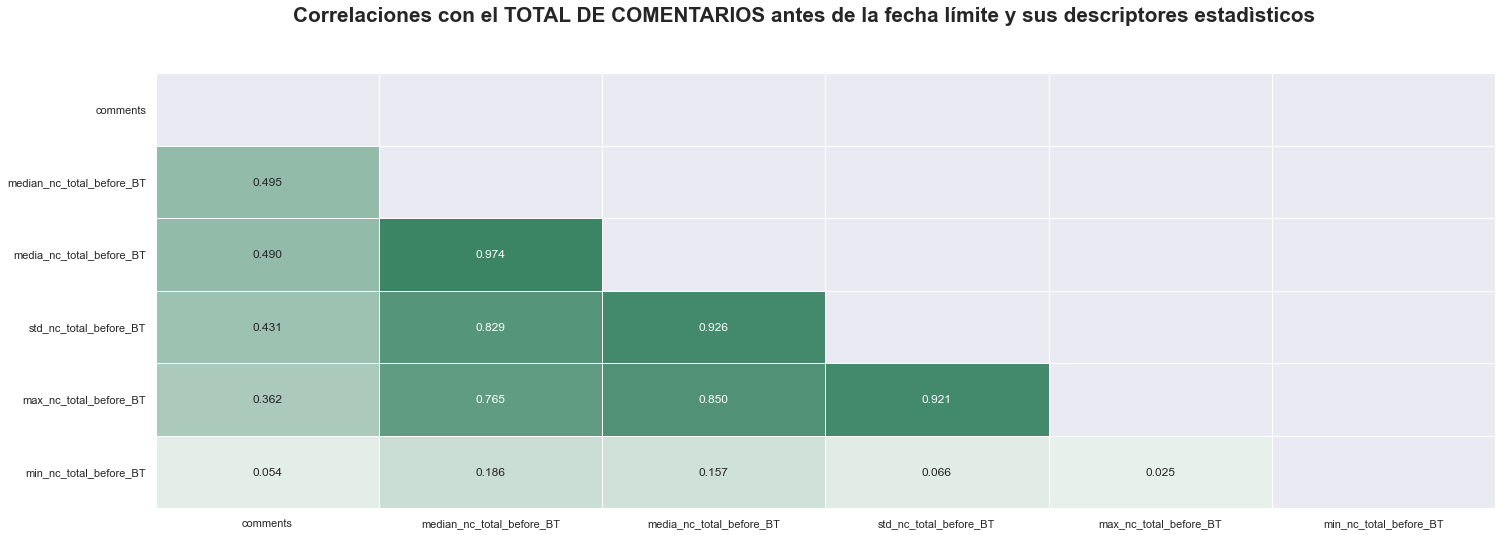

In [14]:

fig = set_figure(24, 8, suptitle='Correlaciones con el TOTAL DE COMENTARIOS antes de la fecha límite y sus descriptores estadìsticos')
show_corr(data=data[labels['sd_nc_total_before_BT'] + [target]], target=target)


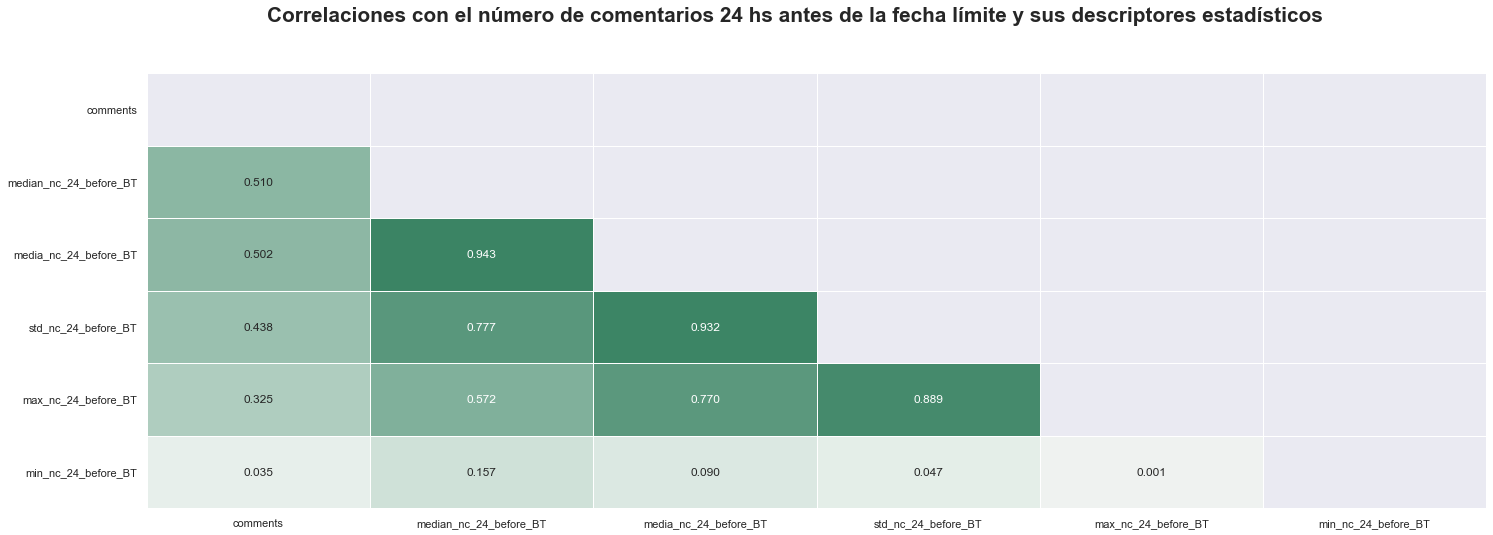

In [15]:
# show_partial_corr(data=data, target=target, labels=labels['nc_24_before_BT'], title='Correlación de características - nc_24_before_BT')

fig = set_figure(24, 8, suptitle='Correlaciones con el número de comentarios 24 hs antes de la fecha límite y sus descriptores estadísticos')
show_corr(data=data[labels['sd_nc_24_before_BT'] + [target]], target=target)
                 

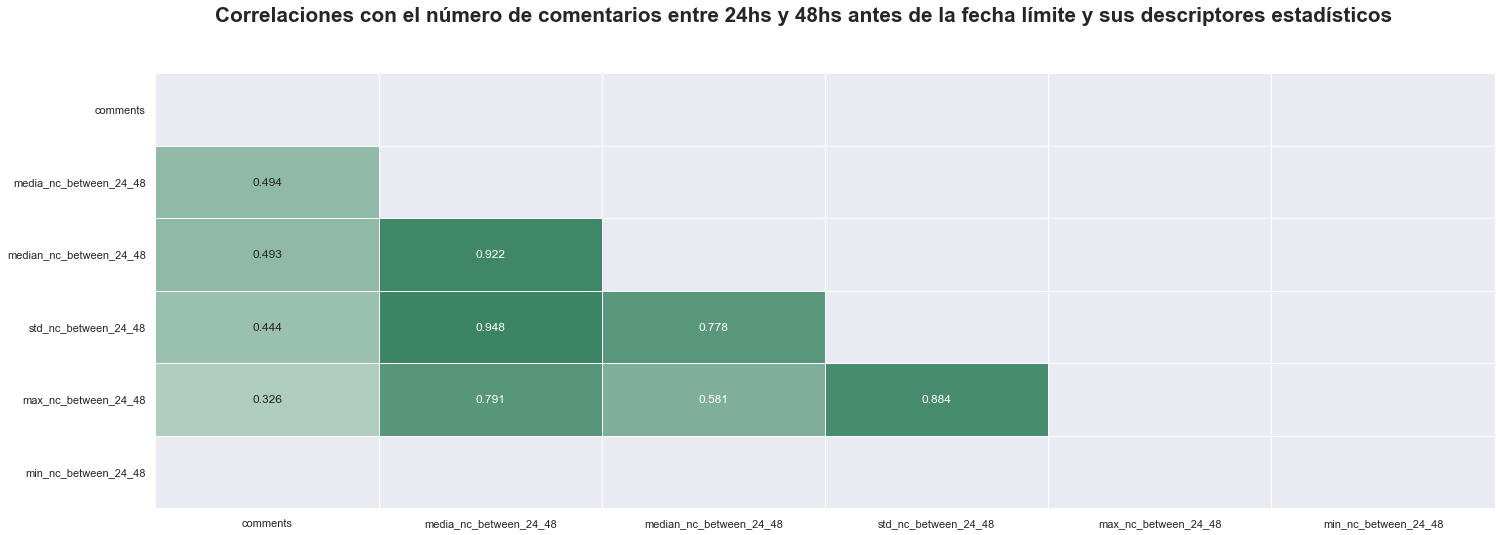

In [16]:
# show_partial_corr(data=data, target=target, labels=labels['nc_between_24_48'], title='Correlación de características - nc_between_24_48')

fig = set_figure(24, 8, suptitle='Correlaciones con el número de comentarios entre 24hs y 48hs antes de la fecha límite y sus descriptores estadísticos')
show_corr(data=data[labels['sd_nc_between_24_48'] + [target]], target=target)


In [12]:
# show_partial_corr(data=data, target=target, labels=labels['nc_24_before_BT'] + labels['nc_between_24_48'], title='Correlación de características - nc_24_before_BT y nc_between_24_48')


In [17]:
# mask = data['nc_total_before_BT'] < 500
# mask = data['comments'] < 500
# work = data[mask]
work = data

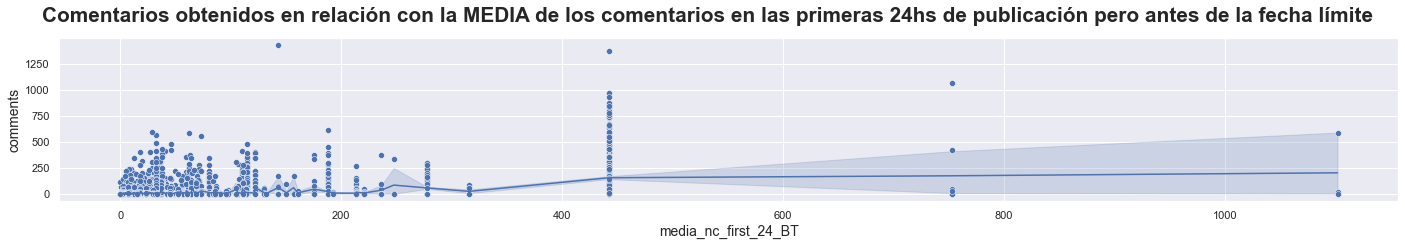

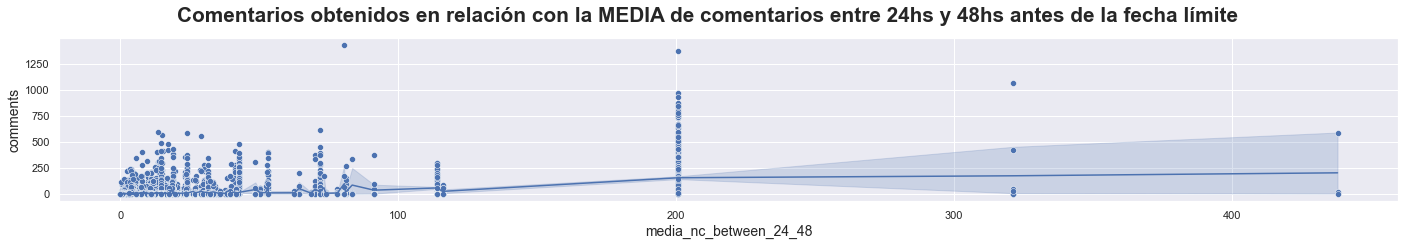

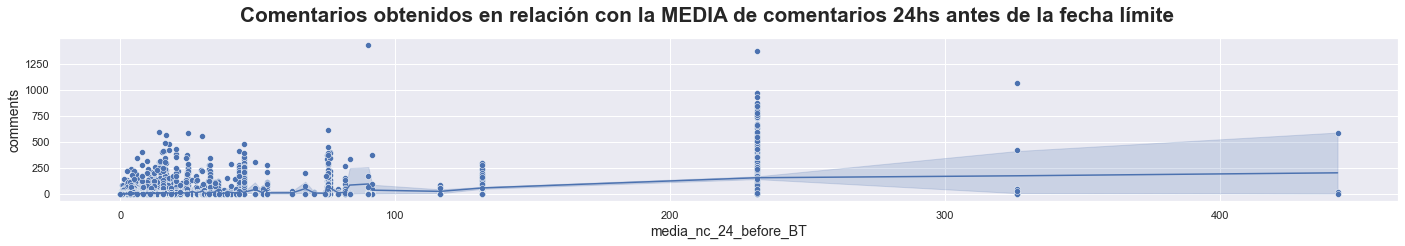

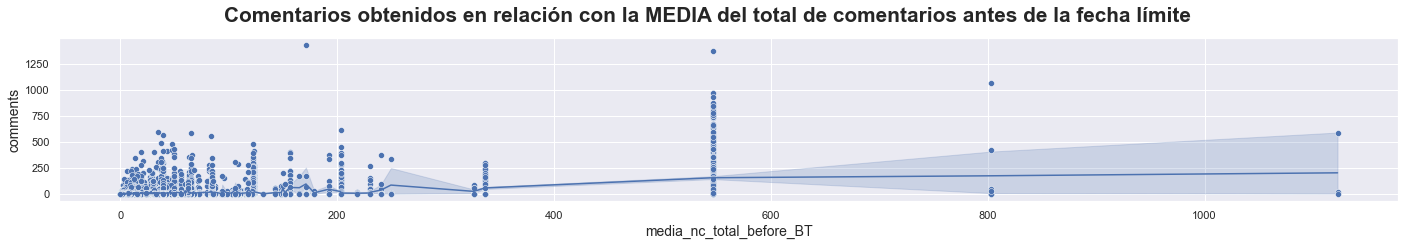

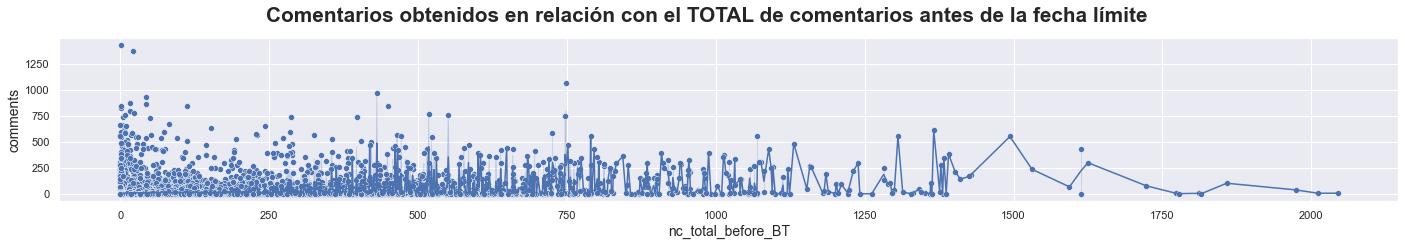

In [18]:
fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de los comentarios en las primeras 24hs de publicación pero antes de la fecha límite')
sns.lineplot(x=work['media_nc_first_24_BT'], y=work['comments'], sort=True, err_style='band');
sns.scatterplot(x=work['media_nc_first_24_BT'], y=work['comments']);

fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de comentarios entre 24hs y 48hs antes de la fecha límite')
sns.lineplot(x=work['media_nc_between_24_48'], y=work['comments'], sort=True, err_style='band');
sns.scatterplot(x=work['media_nc_between_24_48'], y=work['comments']);

# fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de la diferencia de comentarios entre 24hs y 48hs antes de la fecha límite')
# sns.lineplot(x=work['media_nc_diff_24_48'], y=work['comments'], sort=True, err_style='band');
# sns.scatterplot(x=work['media_nc_diff_24_48'], y=work['comments']);


fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de comentarios 24hs antes de la fecha límite')
sns.lineplot(x=work['media_nc_24_before_BT'], y=work['comments'], sort=True, err_style='band');
sns.scatterplot(x=work['media_nc_24_before_BT'], y=work['comments']);

fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA del total de comentarios antes de la fecha límite')
sns.lineplot(x=work['media_nc_total_before_BT'], y=work['comments'], sort=True, err_style='band');
sns.scatterplot(x=work['media_nc_total_before_BT'], y=work['comments']);

fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con el TOTAL de comentarios antes de la fecha límite')
sns.lineplot(x=work['nc_total_before_BT'], y=work['comments'], sort=True, err_style='band');
sns.scatterplot(x=work['nc_total_before_BT'], y=work['comments']);


In [20]:
# find repeated values
mask = np.logical_and(data['media_nc_first_24_BT'] > 440, data['media_nc_first_24_BT'] < 460)
data[mask][labels['sd_nc_first_24_BT'] + ['nc_total_before_BT'] + ['nc_24_before_BT'] + ['comments']]

,media_nc_first_24_BT,std_nc_first_24_BT,min_nc_first_24_BT,max_nc_first_24_BT,median_nc_first_24_BT,nc_total_before_BT,nc_24_before_BT,comments
11596,442.51712,261.05652,0.0,1375.0,443.0,371.0,18.0,0.0
11597,442.51712,261.05652,0.0,1375.0,443.0,66.0,66.0,55.0
11598,442.51712,261.05652,0.0,1375.0,443.0,165.0,165.0,70.0
11599,442.51712,261.05652,0.0,1375.0,443.0,121.0,55.0,4.0
11600,442.51712,261.05652,0.0,1375.0,443.0,235.0,70.0,3.0
...,...,...,...,...,...,...,...,...
12380,442.51712,261.05652,0.0,1375.0,443.0,2.0,2.0,546.0
12381,442.51712,261.05652,0.0,1375.0,443.0,1024.0,46.0,6.0
12382,442.51712,261.05652,0.0,1375.0,443.0,548.0,546.0,224.0
12383,442.51712,261.05652,0.0,1375.0,443.0,772.0,224.0,241.0


In [21]:
# find repeated values
mask = np.logical_and(data['media_nc_between_24_48'] > 190, data['media_nc_between_24_48'] < 210)
data[mask][labels['sd_nc_between_24_48'] + ['nc_total_before_BT'] + ['nc_24_before_BT'] + ['comments']]

,media_nc_between_24_48,std_nc_between_24_48,min_nc_between_24_48,max_nc_between_24_48,median_nc_between_24_48,nc_total_before_BT,nc_24_before_BT,comments
11596,200.90114,238.33151,0.0,1370.0,108.0,371.0,18.0,0.0
11597,200.90114,238.33151,0.0,1370.0,108.0,66.0,66.0,55.0
11598,200.90114,238.33151,0.0,1370.0,108.0,165.0,165.0,70.0
11599,200.90114,238.33151,0.0,1370.0,108.0,121.0,55.0,4.0
11600,200.90114,238.33151,0.0,1370.0,108.0,235.0,70.0,3.0
...,...,...,...,...,...,...,...,...
12380,200.90114,238.33151,0.0,1370.0,108.0,2.0,2.0,546.0
12381,200.90114,238.33151,0.0,1370.0,108.0,1024.0,46.0,6.0
12382,200.90114,238.33151,0.0,1370.0,108.0,548.0,546.0,224.0
12383,200.90114,238.33151,0.0,1370.0,108.0,772.0,224.0,241.0


In [22]:
# find repeated values
mask = np.logical_and(data['media_nc_24_before_BT'] > 230, data['media_nc_24_before_BT'] < 240)
data[mask][labels['sd_nc_24_before_BT'] + ['nc_total_before_BT'] + ['nc_24_before_BT'] + ['comments']]

,media_nc_24_before_BT,std_nc_24_before_BT,min_nc_24_before_BT,max_nc_24_before_BT,median_nc_24_before_BT,nc_total_before_BT,nc_24_before_BT,comments
11596,231.59062,227.5212,0.0,1370.0,186.0,371.0,18.0,0.0
11597,231.59062,227.5212,0.0,1370.0,186.0,66.0,66.0,55.0
11598,231.59062,227.5212,0.0,1370.0,186.0,165.0,165.0,70.0
11599,231.59062,227.5212,0.0,1370.0,186.0,121.0,55.0,4.0
11600,231.59062,227.5212,0.0,1370.0,186.0,235.0,70.0,3.0
...,...,...,...,...,...,...,...,...
12380,231.59062,227.5212,0.0,1370.0,186.0,2.0,2.0,546.0
12381,231.59062,227.5212,0.0,1370.0,186.0,1024.0,46.0,6.0
12382,231.59062,227.5212,0.0,1370.0,186.0,548.0,546.0,224.0
12383,231.59062,227.5212,0.0,1370.0,186.0,772.0,224.0,241.0


In [24]:
data.drop_duplicates(subset=labels['sd_link_between_24_48'])

,media_nc_total_before_BT,std_nc_total_before_BT,min_nc_total_before_BT,max_nc_total_before_BT,median_nc_total_before_BT,media_nc_24_before_BT,std_nc_24_before_BT,min_nc_24_before_BT,max_nc_24_before_BT,median_nc_24_before_BT,...,wednesday_post,thursday_post,friday_post,saturday_post,sunday_post,parents,min_parents,max_parents,media_parents,comments
0,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
1221,123.869190,129.566220,0.0,1065.0,87.0,43.328970,62.774147,0.0,491.0,19.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3285,12.713147,37.326775,0.0,222.0,1.0,5.669322,23.756027,0.0,222.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3536,29.267677,19.170923,0.0,122.0,26.0,11.098485,13.550798,0.0,80.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3932,13.131769,19.307571,0.0,159.0,6.0,6.240072,9.528322,0.0,92.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,16.0,2.428571,0.0
52066,0.384615,1.076923,0.0,4.0,0.0,0.153846,0.600788,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
52224,1.142857,1.245400,0.0,4.0,1.0,0.380952,0.898474,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
52251,0.428571,0.820652,0.0,2.0,0.0,0.142857,0.515079,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0


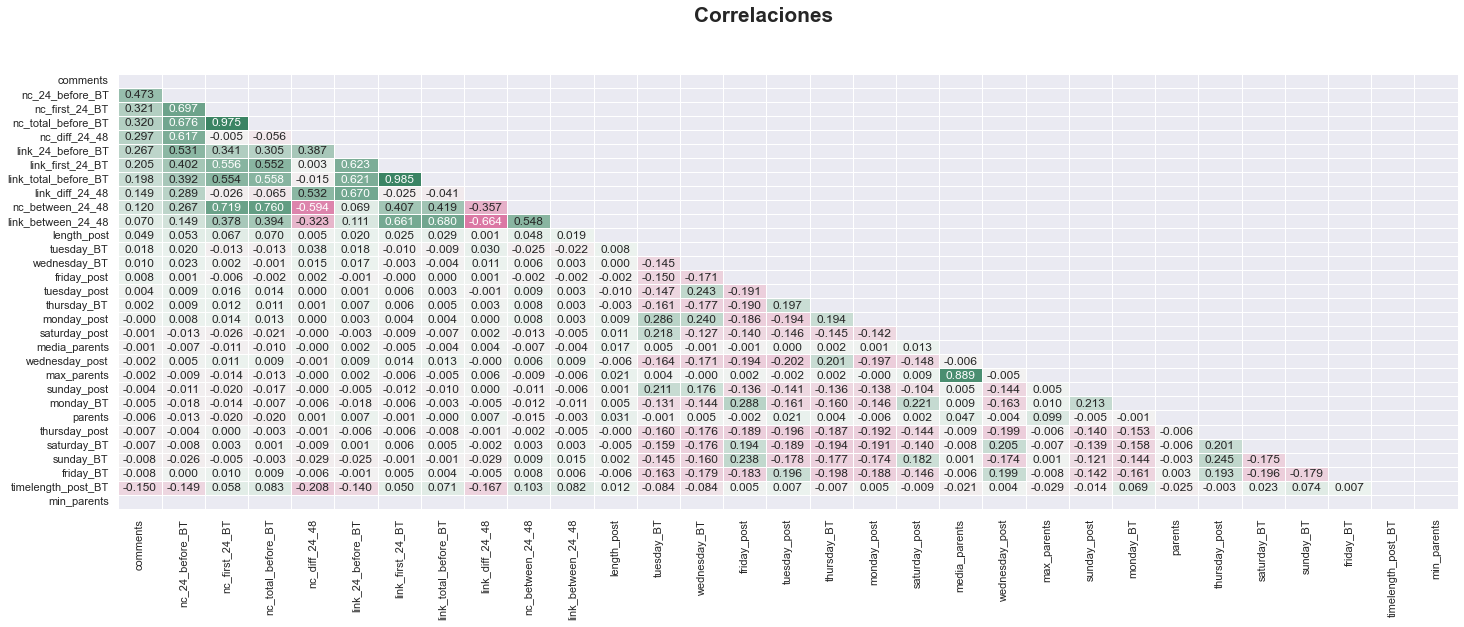

In [32]:
fig = set_figure(24, 8, suptitle='Correlaciones ')
columns = list(data.columns)
show_corr(data=data[columns[50:62] + columns[262:281]], target=target)
